### Task 2 : Social media sentiment analysis
####  Use a dataset of tweets or Facebook posts and perform sentiment analysis to determine the overall sentiment of the posts.


<div style="background-color: black; padding: 10px; ">
  <p style="color: white; text-align: center;">US Airline Tweets Sentiment Analysis</p>
</div>

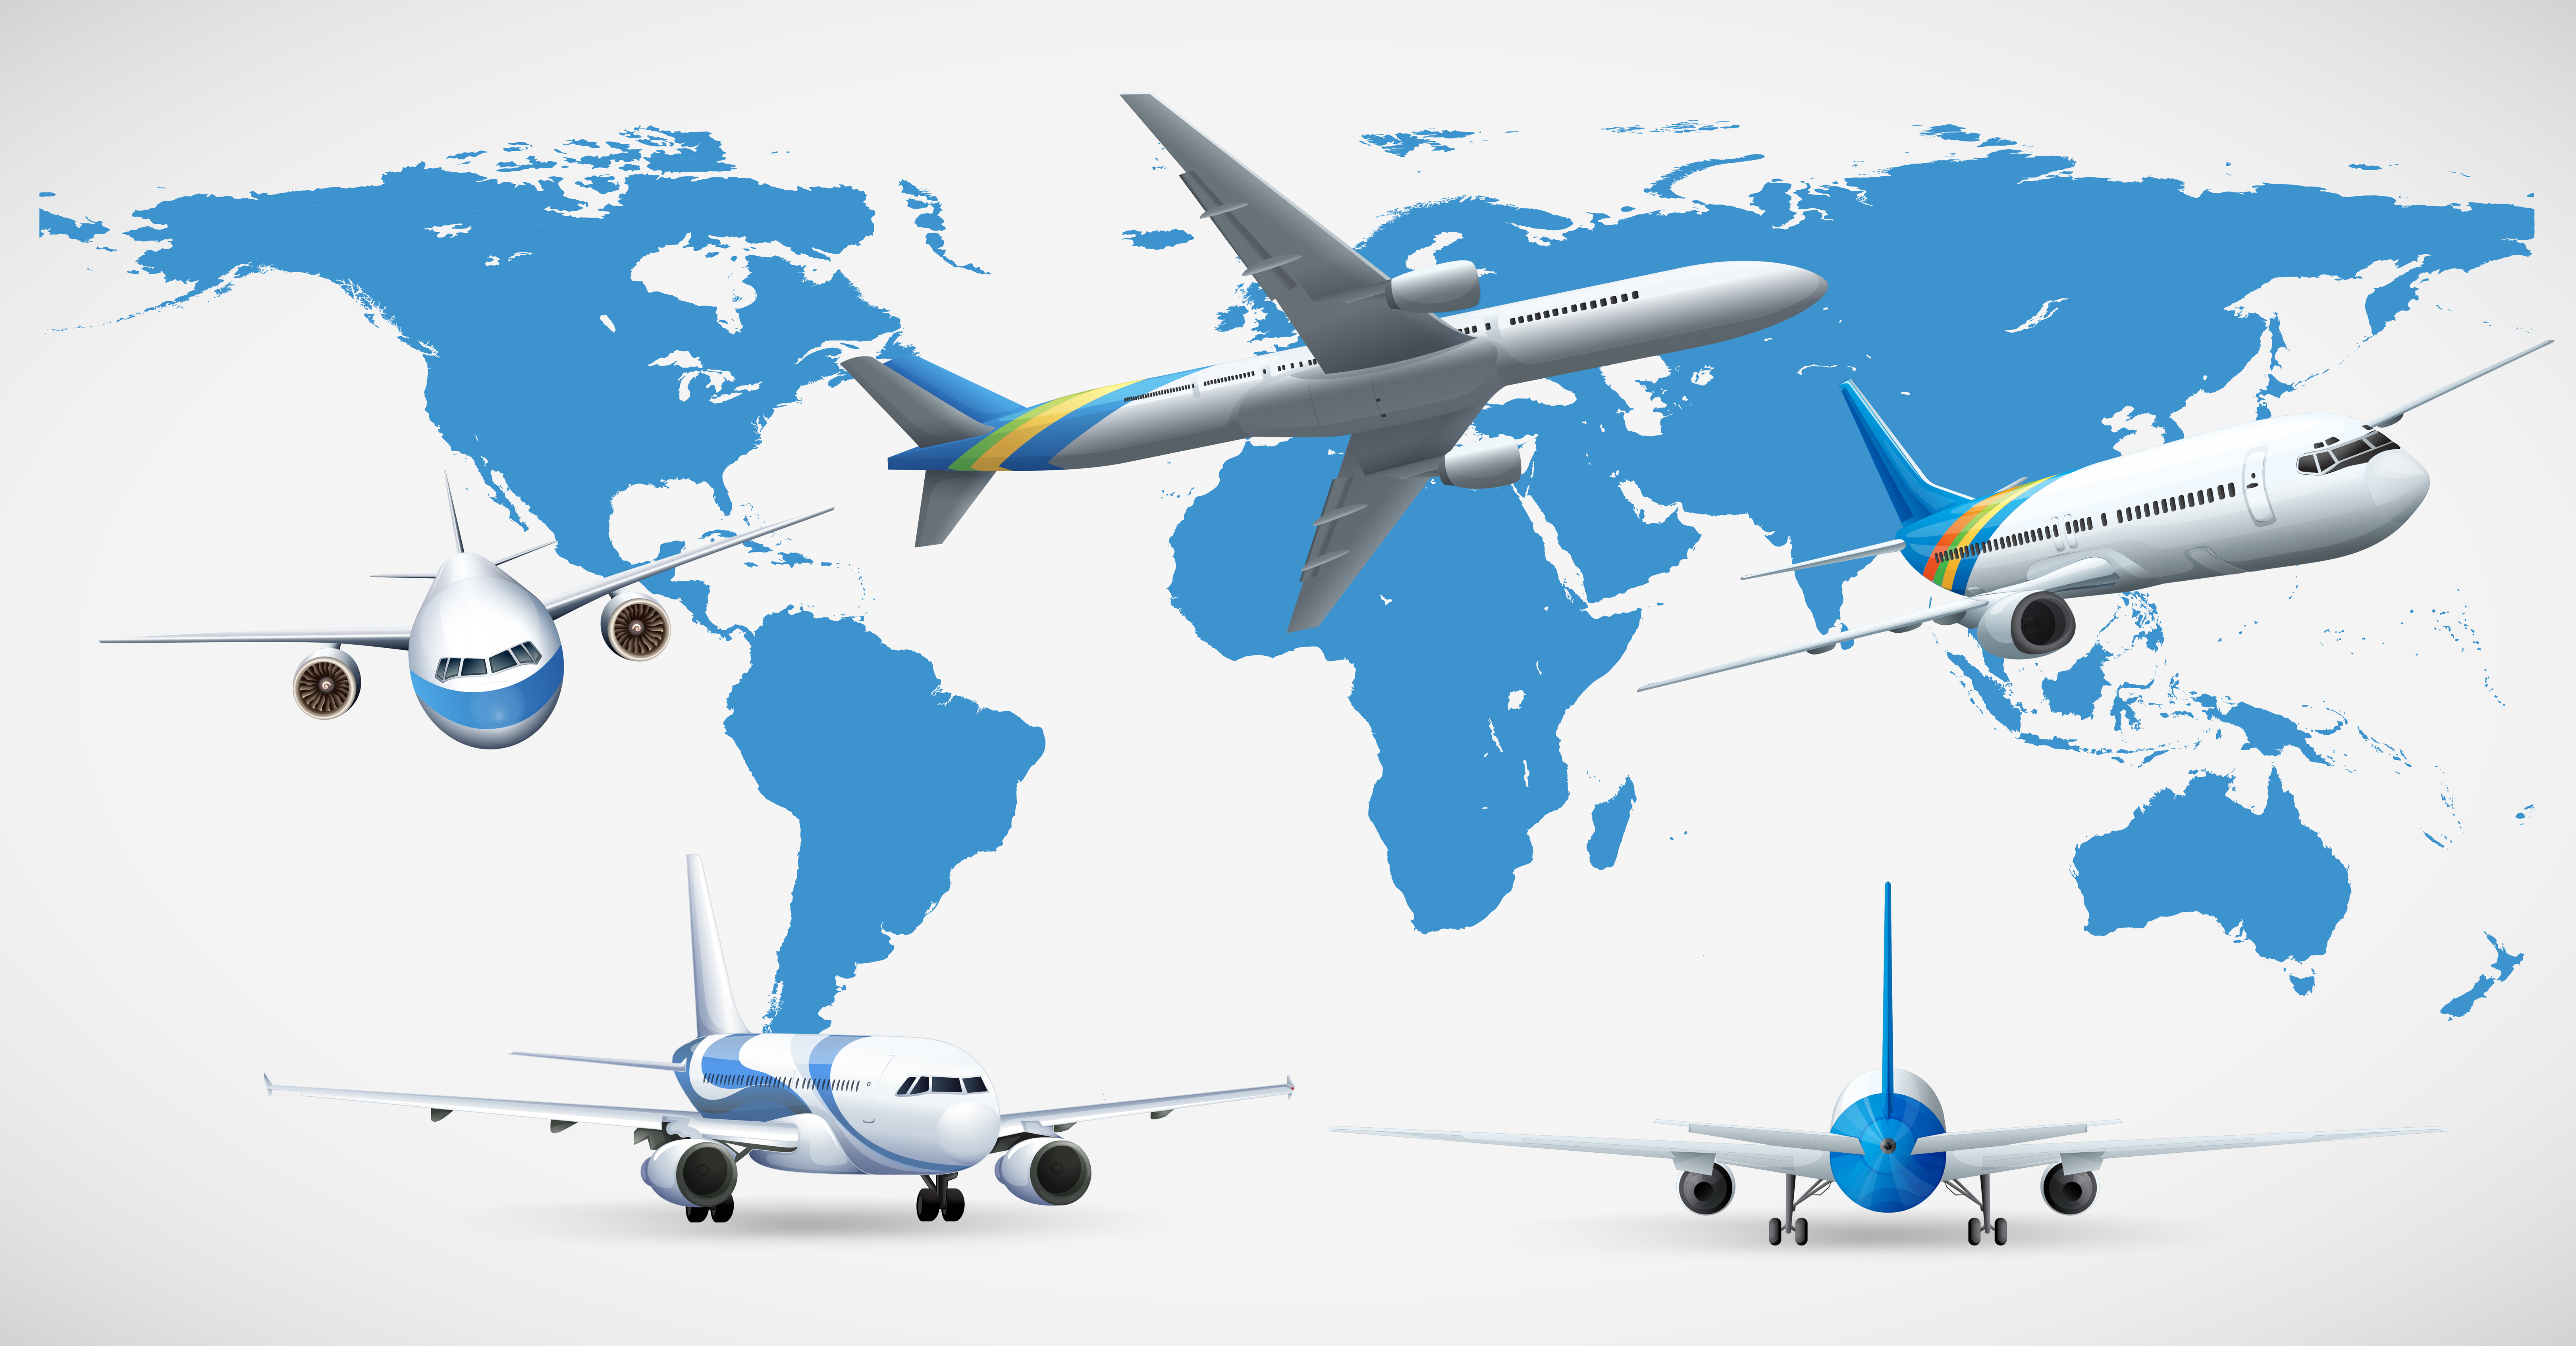
<a href="https://www.freepik.com/free-vector/five-airplanes-blue-map_2188026.htm#query=airline&position=28&from_view=keyword&track=sph">Image by brgfx</a> on Freepik

<div style="background-color: black; padding: 10px;">
<p style="color: white;">IMPORT LIBRARIES</p>
</div>

In [1]:
# Basic Operation
import pandas as pd
import numpy as np

# Text Preprocessing & Cleaning
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import re
import nltk
from nltk.corpus import stopwords


from sklearn.model_selection import train_test_split # Split Data 
from imblearn.over_sampling import SMOTE # Handling Imbalanced

# Model Building
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.svm import SVC


from sklearn.metrics import classification_report , confusion_matrix , accuracy_score # Performance Metrics  


# Data Visualization 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings   


warnings.filterwarnings('ignore')
%matplotlib inline

<div style="background-color: black; padding: 10px;">
<p style="color: white;">LOAD DATA</p>
</div>

In [2]:
df=pd.read_csv(r"C:\Users\USER\Downloads\archive (5)\Tweets.csv")

In [3]:
df

tweet_id airline_sentiment  airline_sentiment_confidence  \
0      570306133677760513           neutral                        1.0000   
1      570301130888122368          positive                        0.3486   
2      570301083672813571           neutral                        0.6837   
3      570301031407624196          negative                        1.0000   
4      570300817074462722          negative                        1.0000   
...                   ...               ...                           ...   
14635  569587686496825344          positive                        0.3487   
14636  569587371693355008          negative                        1.0000   
14637  569587242672398336           neutral                        1.0000   
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence         airline  \
0                         NaN                        NaN  Virgin America   
1                         NaN                     0.0000  Virgin America   
2                         NaN                        NaN  Virgin America   
3                  Bad Flight                     0.7033  Virgin America   
4                  Can't Tell                     1.0000  Virgin America   
...                       ...                        ...             ...   
14635                     NaN                     0.0000        American   
14636  Customer Service Issue                     1.0000        American   
14637                     NaN                        NaN        American   
14638  Customer Service Issue                     0.6659        American   
14639                     NaN                     0.0000        American   

      airline_sentiment_gold             name negativereason_gold  \
0                        NaN          cairdin                 NaN   
1                        NaN         jnardino                 NaN   
2                        NaN       yvonnalynn                 NaN   
3                        NaN         jnardino                 NaN   
4                        NaN         jnardino                 NaN   
...                      ...              ...                 ...   
14635                    NaN  KristenReenders                 NaN   
14636                    NaN         itsropes                 NaN   
14637                    NaN         sanyabun                 NaN   
14638                    NaN       SraJackson                 NaN   
14639                    NaN        daviddtwu                 NaN   

       retweet_count                                               text  \
0                  0                @VirginAmerica What @dhepburn said.   
1                  0  @VirginAmerica plus you've added commercials t...   
2                  0  @VirginAmerica I didn't today... Must mean I n...   
3                  0  @VirginAmerica it's really aggressive to blast...   
4                  0  @VirginAmerica and it's a really big bad thing...   
...              ...                                                ...   
14635              0  @AmericanAir thank you we got on a different f...   
14636              0  @AmericanAir leaving over 20 minutes Late Flig...   
14637              0  @AmericanAir Please bring American Airlines to...   
14638              0  @AmericanAir you have my money, you change my ...   
14639              0  @AmericanAir we have 8 ppl so we need 2 know h...   

      tweet_coord              tweet_created tweet_location  \
0             NaN  2015-02-24 11:35:52 -0800            NaN   
1             NaN  2015-02-24 11:15:59 -0800            NaN   
2             NaN  2015-02-24 11:15:48 -0800      Lets Play   
3             NaN  2015-02-24 11:15:36 -0800            NaN   
4             NaN  2015-02-24 11:14:45 -0800            NaN   
...           ...                        ...            ...   
14635   

<div style="background-color: black; padding: 10px;">
<p style="color: white;">DATA ANALYSIS AND DATA VISUALIZATION</p>
</div>

In [4]:
# Display the first few rows of the dataset
df.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [5]:
# Get summary statistics of the dataset
df.describe().T

count          mean           std  \
tweet_id                      14640.0  5.692184e+17  7.791112e+14   
airline_sentiment_confidence  14640.0  9.001689e-01  1.628300e-01   
negativereason_confidence     10522.0  6.382983e-01  3.304398e-01   
retweet_count                 14640.0  8.265027e-02  7.457782e-01   

                                       min           25%           50%  \
tweet_id                      5.675883e+17  5.685592e+17  5.694779e+17   
airline_sentiment_confidence  3.350000e-01  6.923000e-01  1.000000e+00   
negativereason_confidence     0.000000e+00  3.606000e-01  6.706000e-01   
retweet_count                 0.000000e+00  0.000000e+00  0.000000e+00   

                                       75%           max  
tweet_id                      5.698905e+17  5.703106e+17  
airline_sentiment_confidence  1.000000e+00  1.000000e+00  
negativereason_confidence     1.000000e+00  1.000000e+00  
retweet_count                 0.000000e+00  4.400000e+01

In [6]:
# Check the data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [7]:
# Check for missing values
print(df.isnull().sum())

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


In [8]:
df.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [9]:
df['tweet_created'] = pd.to_datetime(df['tweet_created']).dt.date

In [10]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

In [11]:
df['tweet_created'].min()

Timestamp('2015-02-16 00:00:00')

In [12]:
df['tweet_created'].max()

Timestamp('2015-02-24 00:00:00')

In [13]:
df['tweet_created'].nunique()

9

In [14]:
numberoftweets = df.groupby('tweet_created').size()

In [15]:
numberoftweets

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

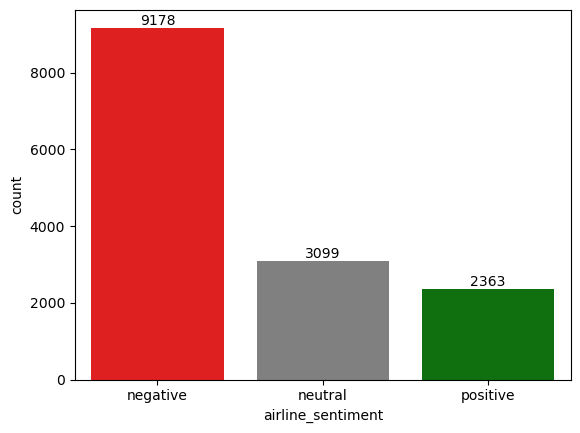

In [16]:
colors ={"neutral": "gray", "positive": "green", "negative": "red"}

ax = sns.countplot(data=df, x="airline_sentiment", order=df.airline_sentiment.value_counts().index, palette=colors)
ax.bar_label(ax.containers[0]);
plt.show()

Reasons Of Negative Tweets : green
Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64


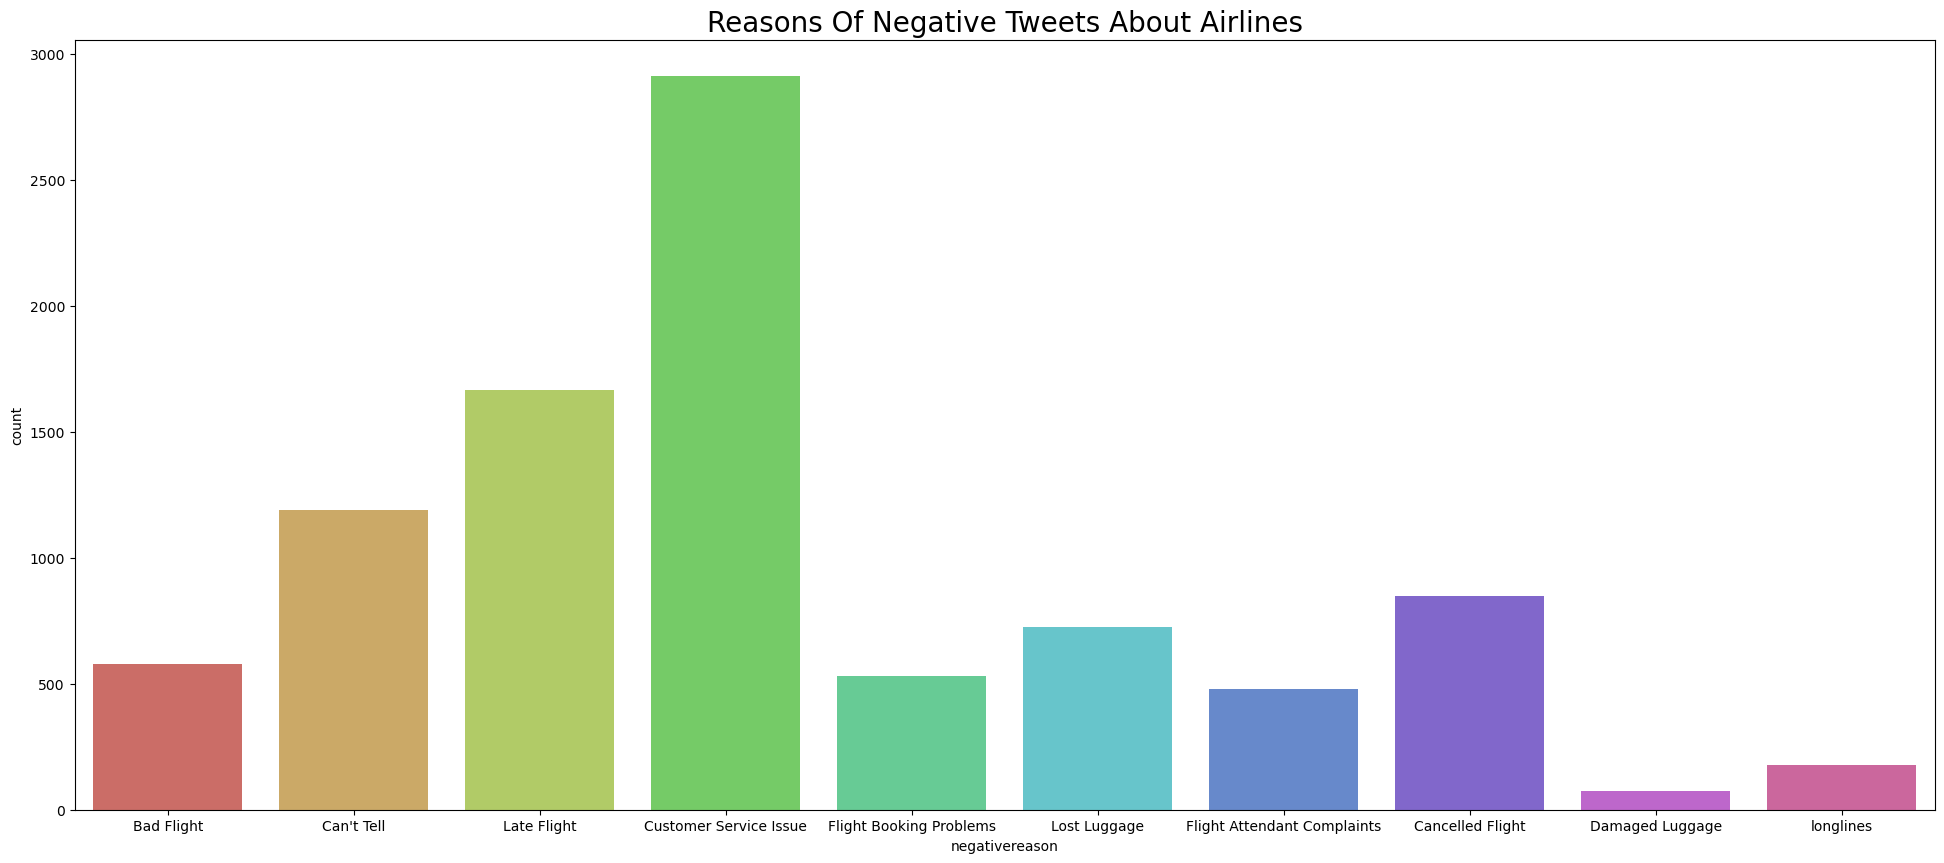

In [17]:
print('Reasons Of Negative Tweets :','green')
print(df.negativereason.value_counts())

plt.figure(figsize = (24, 10))
sns.countplot(x = 'negativereason', data = df, palette = 'hls')
plt.title('Reasons Of Negative Tweets About Airlines', fontsize = 20)
plt.show()

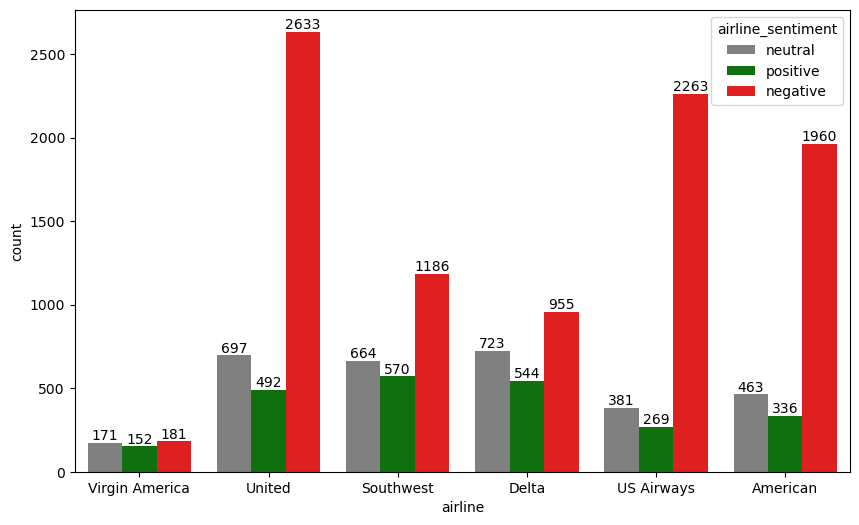

In [18]:
plt.rcParams["figure.figsize"] = (10,6)

#ref: https://stackoverflow.com/questions/46173419/seaborn-change-bar-color-according-to-hue-name
colors ={"neutral": "gray", "positive": "green", "negative": "red"}
ax = sns.countplot(data = df, x ="airline", hue = "airline_sentiment", palette=colors)
for p in ax.containers:
    ax.bar_label(p)

Total number of tweets for each airline : green
airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline_sentiment, dtype: int64


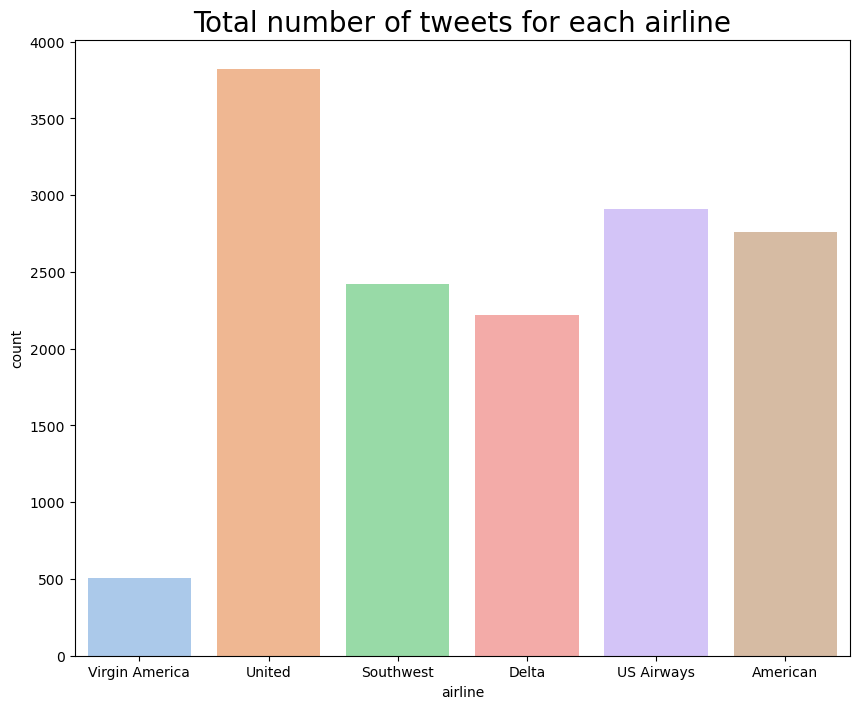

Total number of sentiment tweets for each airline : green
US Airways : 
 negative    2263
neutral      381
positive     269
Name: airline_sentiment, dtype: int64
United : 
 negative    2633
neutral      697
positive     492
Name: airline_sentiment, dtype: int64
American : 
 negative    1960
neutral      463
positive     336
Name: airline_sentiment, dtype: int64
Southwest : 
 negative    1186
neutral      664
positive     570
Name: airline_sentiment, dtype: int64
Delta : 
 negative    955
neutral     723
positive    544
Name: airline_sentiment, dtype: int64
Virgin America : 
 negative    181
neutral     171
positive    152
Name: airline_sentiment, dtype: int64


In [19]:
print("Total number of tweets for each airline :",'green')
print(df.groupby('airline')['airline_sentiment'].count())



plt.figure(figsize = (10, 8))
ax = sns.countplot(x = 'airline', data = df, palette = 'pastel')
ax.set_title(label = 'Total number of tweets for each airline', fontsize = 20)
plt.show()


print("Total number of sentiment tweets for each airline :",'green')
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
for i in airlines :
    print('{} : \n'.format(i),df.loc[df.airline == i].airline_sentiment.value_counts())

In [20]:
df['airline'].unique()

array(['Virgin America', 'United', 'Southwest', 'Delta', 'US Airways',
       'American'], dtype=object)

Total number of tweets for each airline 
  airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


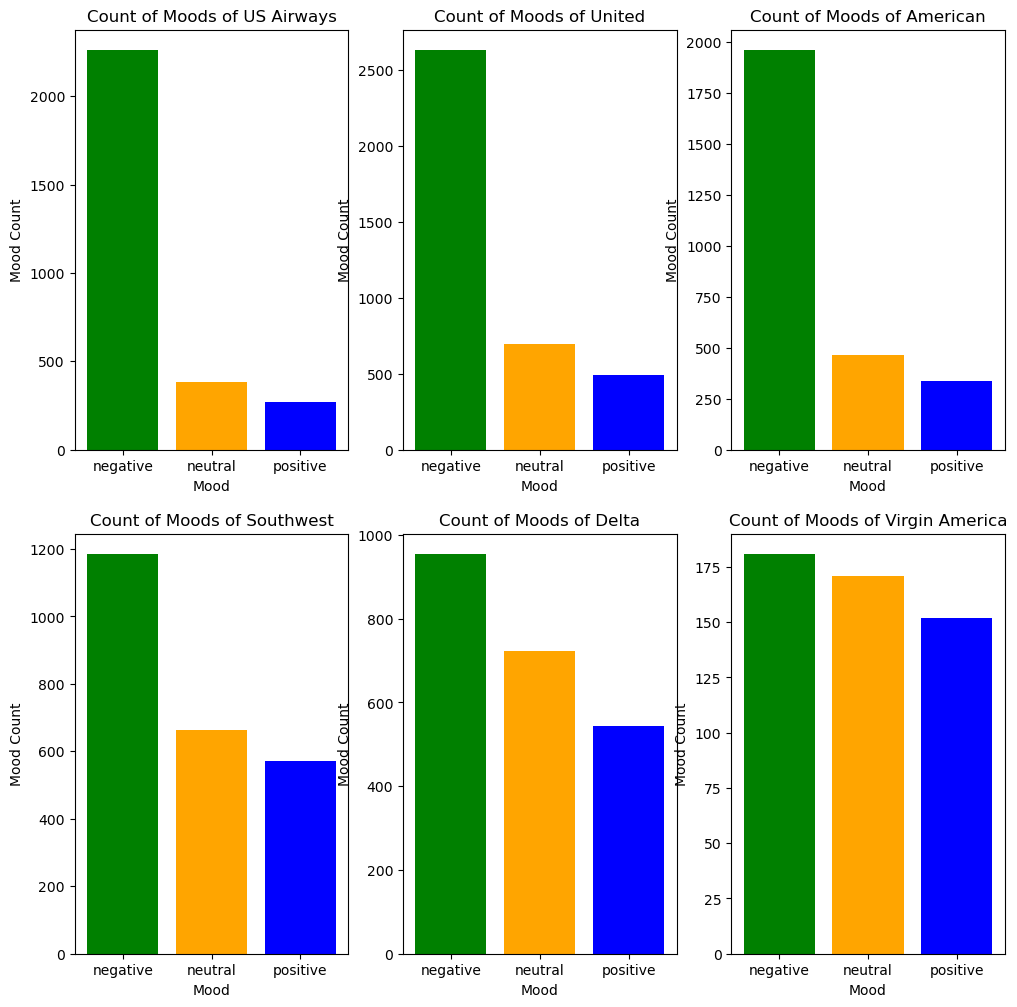

In [21]:
print("Total number of tweets for each airline \n ",df.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines= ['US Airways','United','American','Southwest','Delta','Virgin America']
plt.figure(1,figsize=(12, 12))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    new_df=df[df['airline']==i]
    count=new_df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count, color=['green','orange','blue'])
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+i)

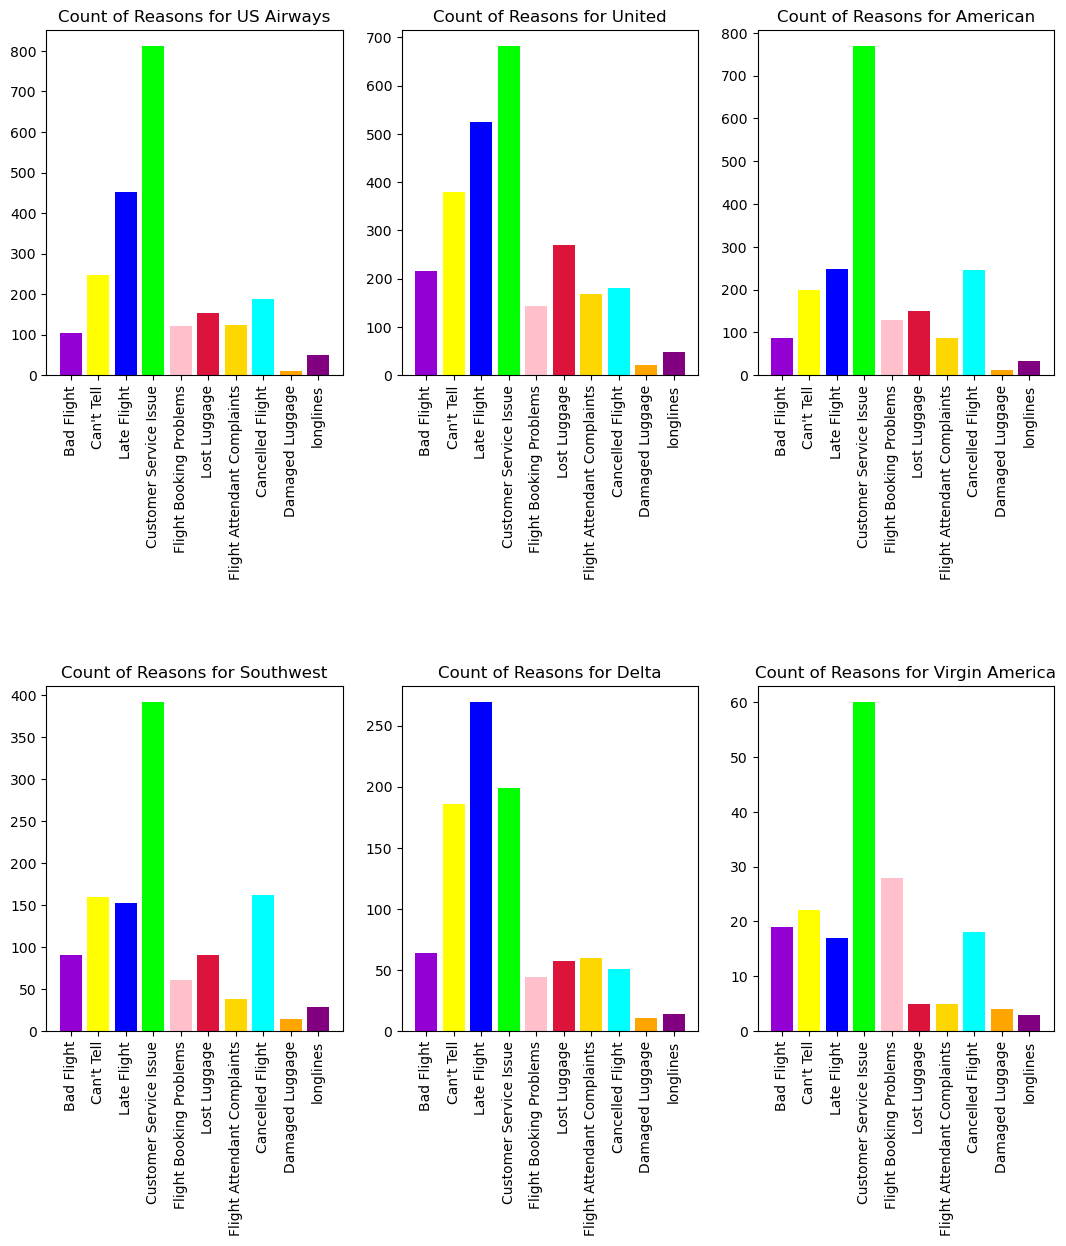

In [22]:
NR_Count=df['negativereason'].value_counts()
def NCount(Airline):
    airlineName =df[df['airline']==Airline]
    count= airlineName['negativereason'].value_counts()
    Unique_reason= df['negativereason'].unique()
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    return Reason_frame

def plot_reason(airline):
    a= NCount(airline)
    count=a['count']
    Id = range(1,(len(a)+1))
    plt.bar(Id,count, color=['darkviolet','yellow','blue','lime','pink','crimson','gold','cyan','orange','purple'])
    plt.xticks(Id,a['Reasons'],rotation=90)
    plt.title('Count of Reasons for '+ airline)
    
plt.figure(2,figsize=(13, 13))
for i in airlines:
    indices= airlines.index(i)
    plt.subplot(2,3,indices+1)
    plt.subplots_adjust(hspace=0.9)
    plot_reason(i)

### Word Cloud of Positive sentiments

In [23]:
from wordcloud import STOPWORDS


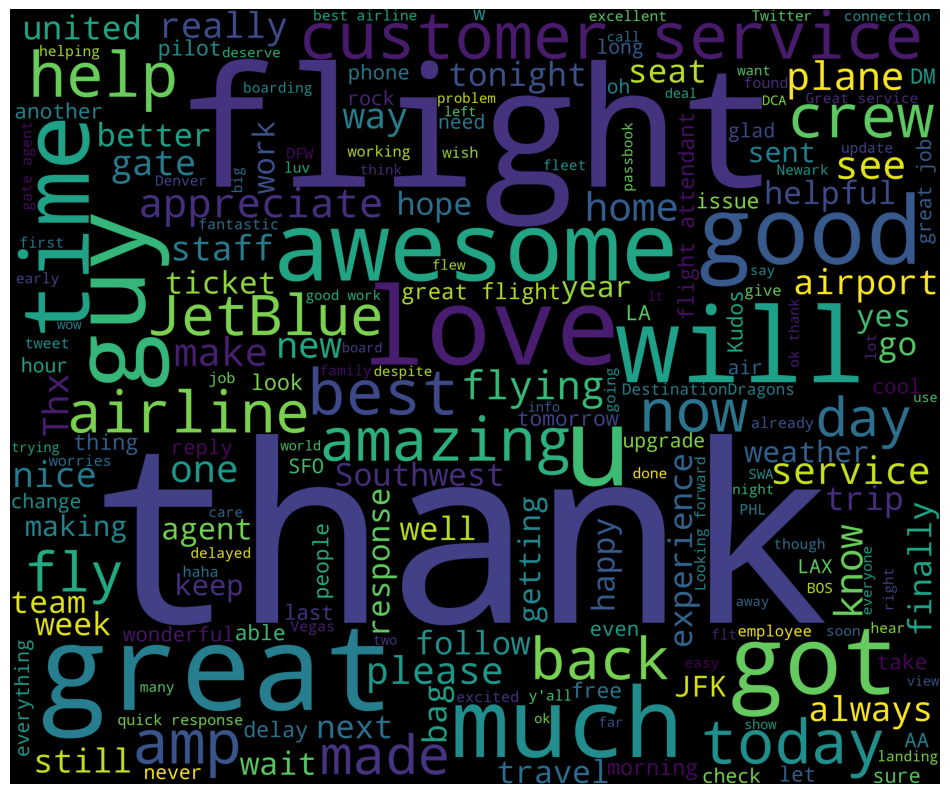

In [24]:
new_df=df[df['airline_sentiment']=='positive']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Word Cloud of Negative sentiments

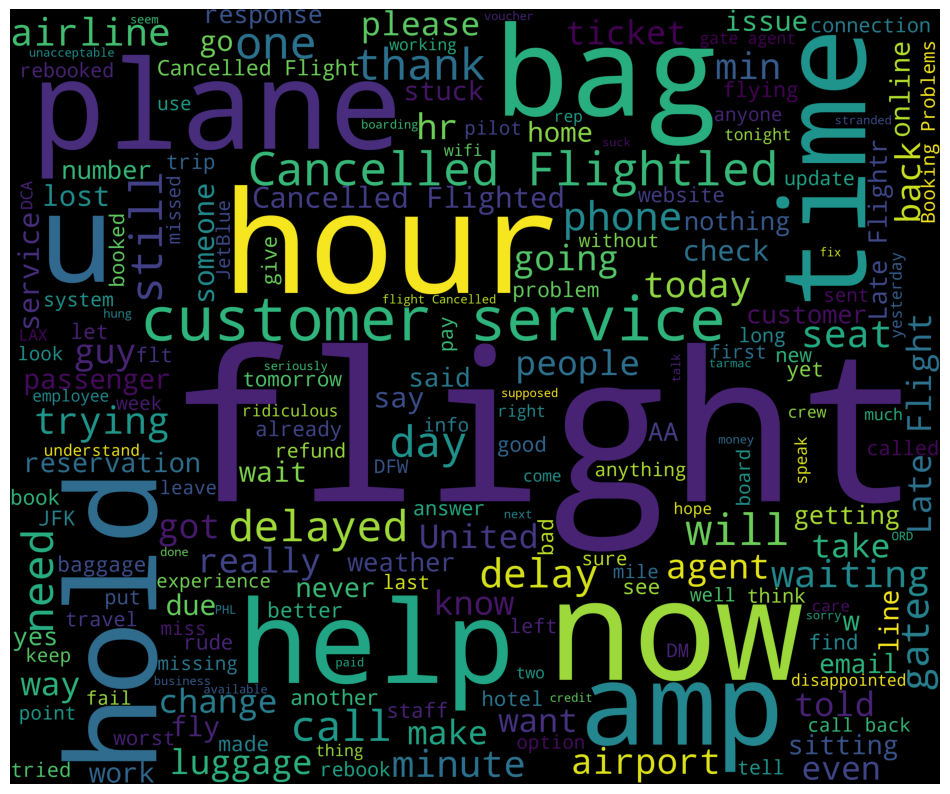

In [25]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

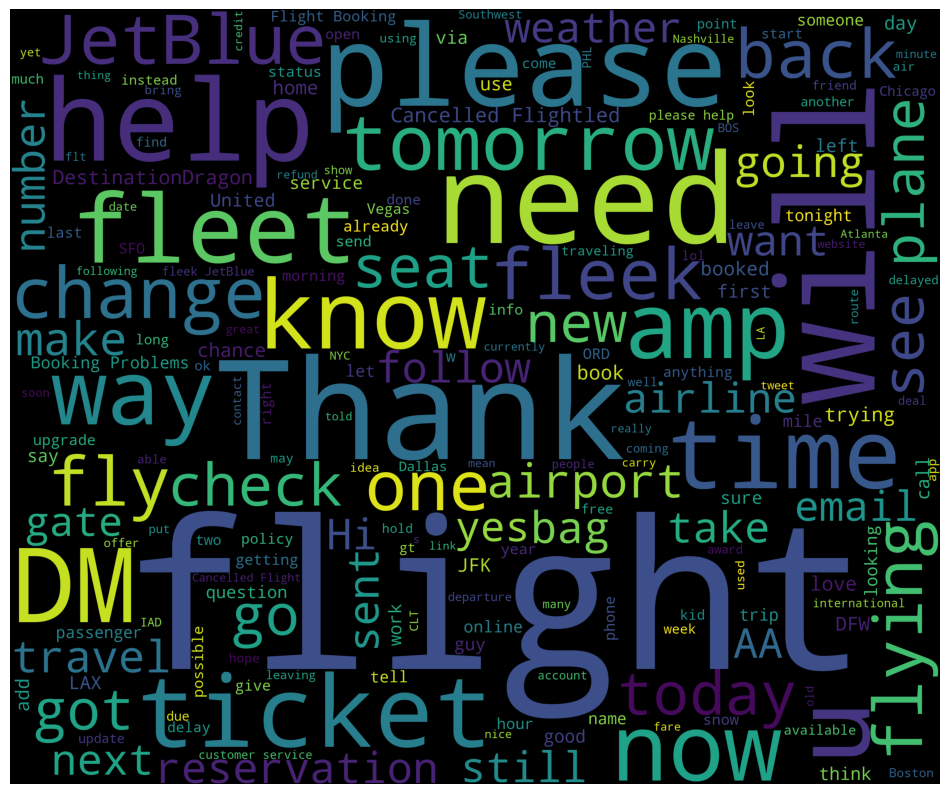

In [26]:
new_df=df[df['airline_sentiment']=='neutral']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<div style="background-color: black; padding: 10px;">
<p style="color: white;">Text Pre Processing and Cleaning.</p>
</div>

In [27]:
# convert Sentiments to 0,1,2
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0

In [28]:
# Apply convert_Sentiment function
df.airline_sentiment = df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [29]:
df.airline_sentiment

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int64

In [30]:
# Remove stop words
def remove_stopwords(text):
    text = ' '.join([word for word in text.split() if word not in (stopwords.words('english'))])
    return text

# Remove url  
def remove_url(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Remove punct
def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

# Remove html 
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove @username
def remove_username(text):
    return re.sub('@[^\s]+','',text)

# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


# Decontraction text
def decontraction(text):
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)
    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    return text  

# Seperate alphanumeric
def seperate_alphanumeric(text):
    words = text
    words = re.findall(r"[^\W\d_]+|\d+", words)
    return " ".join(words)

def cont_rep_char(text):
    tchr = text.group(0) 
    
    if len(tchr) > 1:
        return tchr[0:2] 

def unique_char(rep, text):
    substitute = re.sub(r'(\w)\1+', rep, text)
    return substitute

def char(text):
    substitute = re.sub(r'[^a-zA-Z]',' ',text)
    return substitute

# combaine negative reason with  tweet (if exsist)
df['final_text'] = df['negativereason'].fillna('') + ' ' + df['text'] 


# Apply functions on tweets
df['final_text'] = df['final_text'].apply(lambda x : remove_username(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_url(x))
df['final_text'] = df['final_text'].apply(lambda x : remove_emoji(x))
df['final_text'] = df['final_text'].apply(lambda x : decontraction(x))
df['final_text'] = df['final_text'].apply(lambda x : seperate_alphanumeric(x))
df['final_text'] = df['final_text'].apply(lambda x : unique_char(cont_rep_char,x))
df['final_text'] = df['final_text'].apply(lambda x : char(x))
df['final_text'] = df['final_text'].apply(lambda x : x.lower())
df['final_text'] = df['final_text'].apply(lambda x : remove_stopwords(x))

In [31]:

# result
df['final_text']

0                                                     said
1                  plus added commercials experience tacky
2                   today must mean need take another trip
3        bad flight really aggressive blast obnoxious e...
4                             ca tell really big bad thing
                               ...                        
14635                   thank got different flight chicago
14636    customer service issue leaving minutes late fl...
14637            please bring american airlines blackberry
14638    customer service issue money change flight ans...
14639    ppl need know many seats next flight plz put u...
Name: final_text, Length: 14640, dtype: object

In [32]:
X = df['final_text']
y = df['airline_sentiment']

In [33]:
# Apply TFIDF on cleaned tweets
tfid = TfidfVectorizer()
X_final =  tfid.fit_transform(X)

<div style="background-color: black; padding: 10px;">
<p style="color: white;">Handling Imbalance</p>
</div>

In [34]:
# Handling imbalanced using SMOTE
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

In [35]:
# Split Data into train & test 
X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.2)


### <p style="color: blue;">Decision Tree</p>


In [36]:
ds = DecisionTreeClassifier()
ds.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [38]:
ds_prediction =  ds.predict(X_test)

In [54]:
ds_accuracy=accuracy_score(ds_prediction,y_test)

In [55]:
ds_accuracy

0.9415289631378246

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


In [41]:
# Specify 'micro' averaging for precision, recall, and F1-score
precision_micro = precision_score(y_test, ds_prediction, average='micro')
recall_micro = recall_score(y_test, ds_prediction ,average='micro')
f1_micro = f1_score(y_test,ds_prediction, average='micro')

print("Micro-Averaged Precision:", precision_micro)
print("Micro-Averaged Recall:", recall_micro)
print("Micro-Averaged F1-score:", f1_micro)
class_report = classification_report(y_test, ds_prediction)

print("Classification Report:\n", class_report)

Micro-Averaged Precision: 0.9415289631378246
Micro-Averaged Recall: 0.9415289631378246
Micro-Averaged F1-score: 0.9415289631378247
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1846
           1       0.93      0.91      0.92      1886
           2       0.91      0.93      0.92      1775

    accuracy                           0.94      5507
   macro avg       0.94      0.94      0.94      5507
weighted avg       0.94      0.94      0.94      5507




### <p style="color: blue;">Gaussian Naive Bayes </p>

In [42]:
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [43]:
MultinomialNB()

MultinomialNB()

In [44]:
nb_prediction =  nb.predict(X_test)


In [57]:
nb_accuracy=accuracy_score(nb_prediction,y_test)

In [46]:
# Specify 'micro' averaging for precision, recall, and F1-score
precision_micro = precision_score(y_test, nb_prediction, average='micro')
recall_micro = recall_score(y_test, nb_prediction ,average='micro')
f1_micro = f1_score(y_test,nb_prediction, average='micro')

print("Micro-Averaged Precision:", precision_micro)
print("Micro-Averaged Recall:", recall_micro)
print("Micro-Averaged F1-score:", f1_micro)
class_report = classification_report(y_test, nb_prediction)

print("Classification Report:\n", class_report)

Micro-Averaged Precision: 0.8561830397675686
Micro-Averaged Recall: 0.8561830397675686
Micro-Averaged F1-score: 0.8561830397675686
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      1846
           1       0.92      0.70      0.80      1886
           2       0.87      0.90      0.88      1775

    accuracy                           0.86      5507
   macro avg       0.86      0.86      0.85      5507
weighted avg       0.86      0.86      0.85      5507




### <p style="color: blue;">Support vector machine </p>

In [47]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_prediction = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_prediction)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9102959869257309


In [48]:
# Specify 'micro' averaging for precision, recall, and F1-score
precision_micro = precision_score(y_test, svm_prediction, average='micro')
recall_micro = recall_score(y_test, svm_prediction ,average='micro')
f1_micro = f1_score(y_test,svm_prediction, average='micro')

print("Micro-Averaged Precision:", precision_micro)
print("Micro-Averaged Recall:", recall_micro)
print("Micro-Averaged F1-score:", f1_micro)
class_report = classification_report(y_test, svm_prediction)

print("Classification Report:\n", class_report)

Micro-Averaged Precision: 0.9102959869257309
Micro-Averaged Recall: 0.9102959869257309
Micro-Averaged F1-score: 0.9102959869257309
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1846
           1       0.83      0.93      0.88      1886
           2       0.93      0.80      0.86      1775

    accuracy                           0.91      5507
   macro avg       0.91      0.91      0.91      5507
weighted avg       0.91      0.91      0.91      5507




### <p style="color: blue;">Random Forest </p>

In [49]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
rf_prediction = random_forest_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_prediction)
print("Random Forest Accuracy:", rf_accuracy)

# Specify 'micro' averaging for precision, recall, and F1-score
precision_micro = precision_score(y_test, rf_prediction, average='micro')
recall_micro = recall_score(y_test, rf_prediction, average='micro')
f1_micro = f1_score(y_test, rf_prediction, average='micro')

print("Micro-Averaged Precision:", precision_micro)
print("Micro-Averaged Recall:", recall_micro)
print("Micro-Averaged F1-score:", f1_micro)

class_report = classification_report(y_test, rf_prediction)
print("Classification Report:\n", class_report)


Random Forest Accuracy: 0.9575086253858726
Micro-Averaged Precision: 0.9575086253858726
Micro-Averaged Recall: 0.9575086253858726
Micro-Averaged F1-score: 0.9575086253858726
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1846
           1       0.95      0.93      0.94      1886
           2       0.94      0.95      0.94      1775

    accuracy                           0.96      5507
   macro avg       0.96      0.96      0.96      5507
weighted avg       0.96      0.96      0.96      5507




### <p style="color: blue;">XGB Boost </p>

In [50]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
xgb_prediction = xgb_classifier.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_prediction)
print("XGBoost Accuracy:", xgb_accuracy)

# Specify 'micro' averaging for precision, recall, and F1-score
precision_micro = precision_score(y_test, xgb_prediction, average='micro')
recall_micro = recall_score(y_test, xgb_prediction, average='micro')
f1_micro = f1_score(y_test, xgb_prediction, average='micro')

print("Micro-Averaged Precision:", precision_micro)
print("Micro-Averaged Recall:", recall_micro)
print("Micro-Averaged F1-score:", f1_micro)

class_report = classification_report(y_test, xgb_prediction)
print("Classification Report:\n", class_report)


XGBoost Accuracy: 0.9279099328127838
Micro-Averaged Precision: 0.9279099328127838
Micro-Averaged Recall: 0.9279099328127838
Micro-Averaged F1-score: 0.9279099328127838
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1846
           1       0.89      0.91      0.90      1886
           2       0.91      0.87      0.89      1775

    accuracy                           0.93      5507
   macro avg       0.93      0.93      0.93      5507
weighted avg       0.93      0.93      0.93      5507



In [59]:
import pandas as pd

models = ['Decision Tree', 'Gaussian Naive Bayes', 'Support vector machine','Random Forest',  'XGBoost']
accuracies = [ds_accuracy, nb_accuracy, svm_accuracy, rf_accuracy, xgb_accuracy]

accuracy_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
accuracy_df = accuracy_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print(accuracy_df)


                    Model  Accuracy
0           Random Forest  0.957509
1           Decision Tree  0.941529
2                 XGBoost  0.927910
3  Support vector machine  0.910296
4    Gaussian Naive Bayes  0.856183


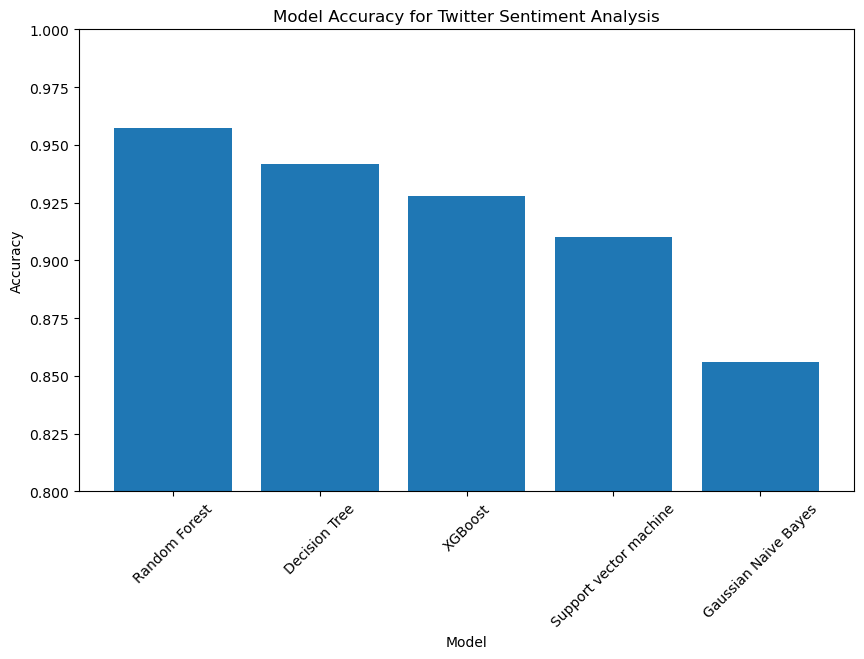

In [61]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df['Model'], accuracy_df['Accuracy'])
plt.title('Model Accuracy for Twitter Sentiment Analysis')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)  # Adjust the y-axis limits as needed
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()





These insights suggest that the ensemble methods, Random Forest and Decision Tree, outperformed the other models in terms of accuracy for the given sentiment analysis task. 

<div style="background-color: black; padding: 10px;">
<p style="color: white;">Cross Validation</p>
</div>

In [69]:
from sklearn.model_selection import cross_val_score
models = [
    ("Random Forest", RandomForestClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("XGBoost", XGBClassifier()),
    ("SVM", SVC()),
    ("XGBClassifier", XGBClassifier())
]

# Evaluate each model using cross-validation
results = []
for model_name, model in models:
    scores = cross_val_score(model, x_sm, y_sm, cv=5, scoring='accuracy')  # 5-fold cross-validation
    results.append((model_name, scores.mean(), scores.std()))

# Create a DataFrame to store the cross-validation results
cv_results = pd.DataFrame(results, columns=["Model", "Mean Accuracy", "Accuracy Std Dev"])

# Sort the results by mean accuracy in descending order
cv_results = cv_results.sort_values(by='Mean Accuracy', ascending=False).reset_index(drop=True)

# Display the cross-validation results
print(cv_results)

           Model  Mean Accuracy  Accuracy Std Dev
0  Random Forest       0.959650          0.009490
1  Decision Tree       0.943052          0.008764
2            SVM       0.931540          0.014927
3        XGBoost       0.923549          0.016852
4  XGBClassifier       0.923549          0.016852


These results indicate that the Random Forest model has the highest mean accuracy, followed by the Decision Tree model, SVM, and the two XGBoost models. The Random Forest model appears to be the most accurate based on this cross-validation evaluation.